In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

<class 'numpy.ndarray'>
Confusion matrix, without normalization
[[2 0 0]
 [0 0 1]
 [1 0 2]]


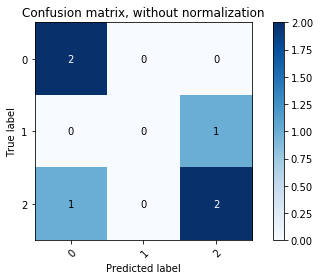

In [38]:
from sklearn.metrics import confusion_matrix
y_true = np.asarray([2, 0, 2, 2, 0, 1])
y_pred = np.asarray([0, 0, 2, 2, 0, 2])
confusion_matrix(y_true, y_pred)
print(type(y_true))
plot_confusion_matrix(y_true, y_pred, classes=np.asarray(['0', '1', "2"]),title='Confusion matrix, without normalization')

In [39]:
y_true = np.asarray(["cat", "ant", "cat", "cat", "ant", "bird"])
y_pred = np.asarray(["ant", "ant", "cat", "cat", "ant", "cat"])
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
#plot_confusion_matrix(y_true, y_pred, classes=np.asarray(["ant", "bird", "cat"]),title='Confusion matrix, without normalization')

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [40]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax